# Question 1 - Data Acquisition
(20 marks) Social media data, such as blogs, articles, news or Twitter posts, is much valuable for data science.
However, how to obtain high-quality social media data becomes an important and challenging problem. Alternatively,
we can collect the data by crowdsourcing, but it might be expensive. Therefore, we prefer to gather social media data
by web scraping.

Please try to crawl 20 pieces of social media data from social media websites. The data should satisfy following
requirements:

1. Types of the article, blog, news or posts with its comments;
2. We just need the textual information;
3. Try to clean the data, i.e., removing all HTML tags.

We provide some social media websites that you can take a try.

• https://english.news.cn
• https://www.bbc.com/news
• https://medium.com
• https://twitter.com

Please submit your code and the obtained social media data.

In [4]:
import random
import re

import requests as r
from bs4 import BeautifulSoup


class Piece:
    __slots__ = 'title', 'content', 'type'

    def __init__(self):
        self.title = ''
        self.content = ''
        self.type = ''


url = r'https://english.news.cn/'

# for i in range(20):
text = r.get(url).text
bf = BeautifulSoup(text)
res = []
#  搜索带有 r'https://english.news.cn' 前缀的连接
for i, item in enumerate(set(bf(href=re.compile("^https://english.news.cn"), limit=10))):
    link = item.attrs['href']
    res.append(Piece())
    bf1 = BeautifulSoup(r.get(link).text)
    res[i].title = bf1.title.string
    plist = bf1.find(id="detailContent").find_all("p")
    if plist:
        res[i].content = ''.join(list(filter(None, map(lambda tag: tag.string, plist))))
for i, piece in enumerate(res):
    print("\npage index: {} (from crawling): \n".format(i))
    print("title: ", piece.title)
    print("content: \n", piece.content)


page index: 0 (from crawling): 

title:  
            Heroic rescue of British POWs in WWII | Stories shared by Xi Jinping-Xinhua
        
content: 
 Eighty years ago, some Chinese fishermen risked their lives to rescue British prisoners of war aboard the "Lisbon Maru." Chinese President Xi Jinping hails the heroic effort as bearing important witness to the two countries fighting side by side as allies during WWII against fascist aggression. #XiJinping

page index: 1 (from crawling): 

title:  
            Chinese mainland rises to 11th place on WIPO's innovation rankings-Xinhua
        
content: 
 Visitors watch as a surgery robot demonstrates at Shougang Park during the 2022 China International Fair for Trade in Services (CIFTIS) in Beijing, capital of China, Sept. 3, 2022. (Xinhua/Ju Huanzong)BEIJING, Sept. 29 (Xinhua) -- The Chinese mainland has climbed to 11th place on the Global Innovation Index (GII) 2022 released by the World Intellectual Property Organization (WIPO), up one p

# Question 2
1. Write the pattern to check that a string only contains a certain set of characters (in this case a-zA-Z and 0-9).
- Test cases: ABCDEFabcdef123450 and ABCD@Fabcdef123450

In [5]:
import re


# check the string whether forms the regex
def check_regex(regex, s):
    search = re.search(regex, s)
    if search:
        print("origin string: ", s, "\nresult: pass!")
        return
    print("origin string: ", s, "\nresult: fail!")


# return the string whether forms the regex
def match_regex(regex, s):
    search = re.search(regex, s)
    if search:
        print("origin string: ", s, "\nresult: ", search.group())
        return
    print("origin string: ", s, "\nresult: no matches!")


# return all strings whether forms the regex
def match_all_regex(regex, s):
    findall = re.findall(regex, s)
    if findall:
        print("string to match: ", s, "\nresult:", findall)
        return
    print("string to match: ", s, "\nresult: no matches!")


# Write the pattern to check that a string only contains a certain set of characters (in this case a-zA-Z and 0-9).
print("\n 2.1")
regex = re.compile('^[A-Za-z0-9]+$')
check_regex(regex, "ABCDEFabcdef123450")
check_regex(regex, "ABCD@Fabcdef123450")

# Write the pattern that matches a string that has an ‘a’ followed by one or more ‘b’.
print("\n 2.2")
regex = re.compile('b+a*')
match_regex(regex, "abbbbb")
match_regex(regex, "bab")
match_regex(regex, "baaaa")
match_regex(regex, "aaaaa")

#  Write the pattern to check whether a string starts and ends with a specific number (in this case 6).
print("\n 2.3")
regex = re.compile("^6.*6?$")
check_regex(regex, "65117896")
check_regex(regex, "78238936")
check_regex(regex, "6")
check_regex(regex, "56666665")

# Write the pattern to search the number (0-9) of length between 2-4 in a given string
print("\n 2.4:")
regex = re.compile("\d{2,4}")
match_regex(regex, "1")
match_regex(regex, "23")
match_regex(regex, "345")
match_regex(regex, "45678")

# Write the pattern to remove leading zeros from an IP address.
print("\n 2.5:")


def remove_regex(regex, s):
    sToRemove = re.search(regex, s).group()
    if sToRemove:
        s = s.replace(sToRemove, "")
    print("remove result: ", s)


regex = re.compile("^(0+)")
remove_regex(regex, "0000000002121210")

# Write the pattern to replace whitespaces with an underscore and vice versa.
print("\n 2.6:")
s = "Python Exercises of Regular_Expression"
re.sub('\s', '+', s)
re.sub(s, '_', '\s')
re.sub(s, '+', '_')
print("origin string: ", s, "\nresult: ", s)

#! Write the pattern to convert the date of yyyy-mm-dd format to dd-mm-yyyy
print("\n 2.7:")
s = "2022-09-14"


def match(regex, s):
    return re.search(re.compile(regex), s).group() if re.search(re.compile(regex), s) else ""


year, month, day = match("^\d{4}", s), match("(?<=-)\d{2}(?=-)", s), match('\d{2}$', s)
rs = year + '-' + month + '-' + day
print("origin string: ", s, "\nreverse result: ", rs)

# ! Write the pattern to find all words starting with ‘a’ and ‘e’.
print("\n 2.8:")
s = "The following example creates an ArrayList with a capacity of 50 elements. Four elements are then""added to the ArrayList and the ArrayList is trimmed accordingly."
match_all_regex(r"\b[ae][a-zA-Z]*\b", s)

# Write the pattern to extract values between quotation marks of a string.
print("\n 2.9:")
regex = re.compile("\"")
print("origin string: ", "\"Python\"", "\nresult: ", re.sub(regex, "", "\"Python\""))
print("origin string: ", "\"Google Data Studio\"", "\nresult: ", re.sub(regex, "", "\"Google Data Studio\""))

# Write the pattern to find urls in a string.
print("\n 2.10:")
regex = re.compile("(http?s|ftp)://[a-zA-Z0-9@#/$%:.,;?=~_|]+[a-zA-Z0-9+&@#/%=~_|]")
match_regex(regex, "https://www.w3schools.com/")
match_regex(regex, "https://www.github.com")


 2.1
origin string:  ABCDEFabcdef123450 
result: pass!
origin string:  ABCD@Fabcdef123450 
result: fail!

 2.2
origin string:  abbbbb 
result:  bbbbb
origin string:  bab 
result:  ba
origin string:  baaaa 
result:  baaaa
origin string:  aaaaa 
result: no matches!

 2.3
origin string:  65117896 
result: pass!
origin string:  78238936 
result: fail!
origin string:  6 
result: pass!
origin string:  56666665 
result: fail!

 2.4:
origin string:  1 
result: no matches!
origin string:  23 
result:  23
origin string:  345 
result:  345
origin string:  45678 
result:  4567

 2.5:
remove result:  2121210

 2.6:
origin string:  Python Exercises of Regular_Expression 
result:  Python Exercises of Regular_Expression

 2.7:
origin string:  2022-09-14 
reverse result:  2022-09-14

 2.8:
string to match:  The following example creates an ArrayList with a capacity of 50 elements. Four elements are thenadded to the ArrayList and the ArrayList is trimmed accordingly. 
result: ['example', 'an', 'a', 'el

# Question 3 - Data Visualization
(20 marks) Data visualization is an effective method to overall evaluate the quality of the data. Generally, the
conventional visualizations include column histogram/chart, pie chart, venn diagram, scatter plot, heatmap, etc.

## Answer3.1 :
We can use user_id as x-axes and weight as y-axes with sex groups in a __scatter plot__ .
We can use age as x-axes and height as y-axes with sex groups in a __scatter plot__ .
We can use age as x-axes and weight as y-axes with sex groups in a __scatter plot__ .
We can use user_id as x-axes and age as y-axes  with sex groups in a __scatter plot__ .
Then We can generate a multiple plots.

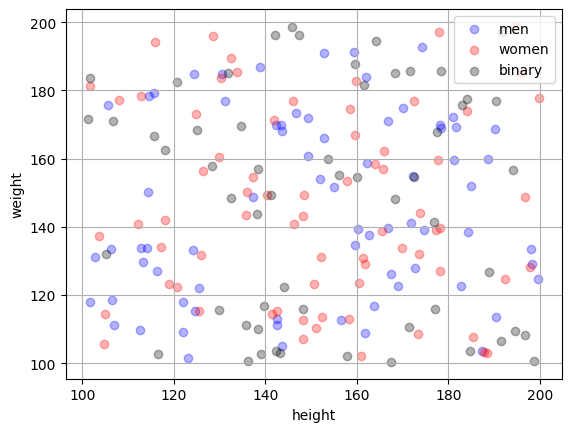

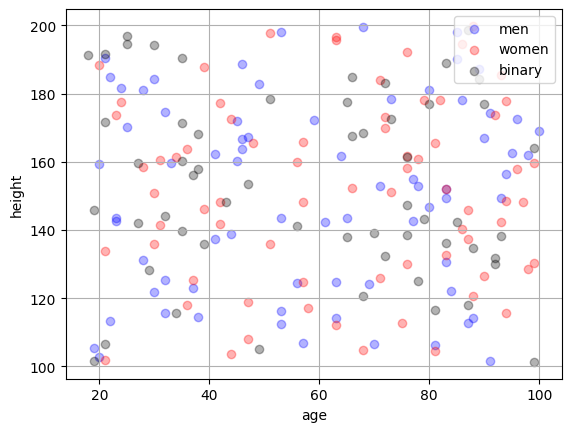

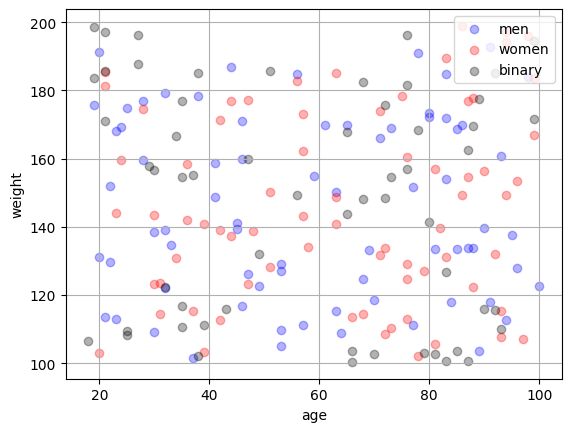

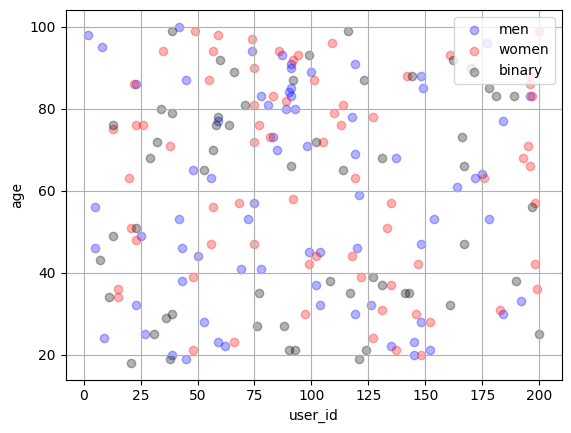

In [47]:
# Answer3.2
from collections import defaultdict
from matplotlib import pyplot as plt

men, women, binary = defaultdict(list), defaultdict(list), defaultdict(list)
attrList = ['user_id', 'sex', 'age', 'height', 'weight']


def generateUsers():
    for i in range(200):
        user_id = random.randint(1, 200)
        sex = random.randint(1, 3)
        age = random.randint(18, 100)
        height = random.uniform(100.0, 200.0)
        weight = random.uniform(100.0, 200.00)
        if sex == 1:
            men['user_id'].append(user_id)
            men['age'].append(age)
            men['height'].append(height)
            men['weight'].append(weight)
        elif sex == 2:
            women['user_id'].append(user_id)
            women['age'].append(age)
            women['height'].append(height)
            women['weight'].append(weight)
        else:
            binary['user_id'].append(user_id)
            binary['age'].append(age)
            binary['height'].append(height)
            binary['weight'].append(weight)


def draw(menList, womenList, binaryList, attrList):
    # sex - height(x) - weight(y)
    xList, yList = [], []

    fig, ax = plt.subplots(1, 1)
    ax.scatter(menList['height'], menList['weight'], c='blue', label='men', alpha=0.3)
    ax.scatter(womenList['height'], womenList['weight'], c='red', label='women', alpha=0.3)
    ax.scatter(binaryList['height'], binaryList['weight'], c='black', label='binary', alpha=0.3)
    plt.xlabel("height")
    plt.ylabel("weight")
    ax.legend( loc = 'upper right')
    ax.grid(True)

    fig, ax = plt.subplots(1, 1)
    ax.scatter(menList['age'], menList['height'], c='blue', label='men', alpha=0.3)
    ax.scatter(womenList['age'], womenList['height'], c='red', label='women', alpha=0.3)
    ax.scatter(binaryList['age'], binaryList['height'], c='black', label='binary', alpha=0.3)
    plt.xlabel("age")
    plt.ylabel("height")
    ax.legend( loc = 'upper right')
    ax.grid(True)
    plt.show()

    fig, ax = plt.subplots(1, 1)
    ax.scatter(menList['age'], menList['weight'], c='blue', label='men', alpha=0.3)
    ax.scatter(womenList['age'], womenList['weight'], c='red', label='women', alpha=0.3)
    ax.scatter(binaryList['age'], binaryList['weight'], c='black', label='binary', alpha=0.3)
    plt.xlabel("age")
    plt.ylabel("weight")
    ax.legend( loc = 'upper right')
    ax.grid(True)
    plt.show()


    fig, ax = plt.subplots(1, 1)
    ax.scatter(menList['user_id'], menList['age'], c='blue', label='men', alpha=0.3)
    ax.scatter(womenList['user_id'], womenList['age'], c='red', label='women', alpha=0.3)
    ax.scatter(binaryList['user_id'], binaryList['age'], c='black', label='binary', alpha=0.3)
    plt.xlabel("user_id")
    plt.ylabel("age")
    ax.legend( loc = 'upper right')
    ax.grid(True)
    plt.show()

generateUsers()
draw(men, women, binary, attrList)

Text(0.5, 1.0, 'the attention score of Q and K')

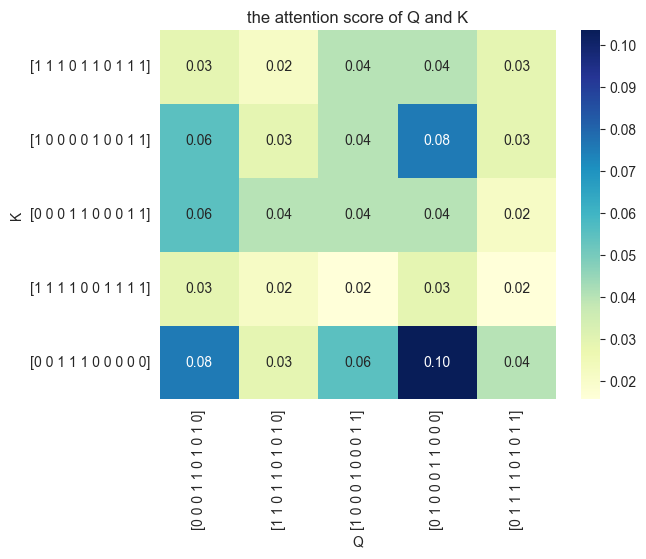

In [27]:
import matplotlib
import numpy as np
# Answer 3.3
from numpy import random
from scipy.special import softmax
import matplotlib.pyplot as plt
import seaborn as sns
Q = np.random.randint(0, 2,  size = [5, 10])
K = np.random.randint(0, 2,size = [5, 10])
# print(Q @ K.transpose() / (10 ** 0.5))
scores = softmax(Q @ K.transpose() / (10 ** 0.5))
# print(scores)
ax = sns.heatmap(scores,cmap="YlGnBu", fmt = ".2f", annot=True)
plt.xlabel("Q")
plt.ylabel("K")
plt.yticks([i + 0.5 for i in range(0,5)], labels=K, rotation = 0)
plt.xticks([i + 0.5 for i in range(0,5)], labels=Q, rotation=90)
ax.set_title("the attention score of Q and K")

# Question4
Given the following B+-tree, please answer following questions.

__4.1 What is the value of p for this B+-tree? (Note that p is the order of a B+-tree)__

the p value is  `3`

__2. Can you re-build a taller B+-tree with the same value of p using the same set of search-key values in the leaf
nodes of the given tree? If yes, show the steps by drawing a new diagram whenever the height of the tree
increases.__

The Answer is in the zip file "image.zip"

__3. Insert the search-key values 32, 84, and 19 in sequence to the given B+-tree, and draw a new diagram for each
insertion.__

The Answer is in the zip file "image.zip".

__4. Suggest a sequence of search-key values to be deleted from the resultant B+-tree in Q4.2 to shrink the tree to 2
levels with the least number of deletions. Show the steps by drawing a new diagram whenever a node is deleted.__

We can delete in the order of {77, 34,21,51,53}
The Images of each step is in the zip file "image.zip".